# Introduction to Pytorch

# Import

In [1]:
import importlib

In [2]:
def print_module_version(module:str):
    try:
        version = importlib.metadata.version(module)
        print(f"${module} version: ",version)
    except:
        print(f"We could not find a version for ${module} or the module is not installed.")

In [3]:
import torch
print_module_version("torch")
import torchtext
print_module_version("torchtext")
import torchvision
print_module_version("torchvision")
import torchaudio
print_module_version("torchaudio")



$torch version:  2.0.0
$torchtext version:  0.15.0
$torchvision version:  0.15.0
$torchaudio version:  2.0.0


## Quickstart


| Primitive | Description |
|---|---|
| `torch.utils.data.Dataset` |  - Stores individual data samples and their corresponding labels. <br> - Implements the `__getitem__` method to access a specific sample by index. <br> - Implements the `__len__` method to return the total number of samples in the dataset. |
| `torch.utils.data.DataLoader` | - Wraps an iterable around a `Dataset`. <br> - Provides functionalities for loading data in batches during training.  <br> - Handles shuffling data (optional) for reducing overfitting. <br> - Offers multiprocessing capabilities for faster data loading (optional). |


PyTorch offers domain-specific libraries such as `TorchText, TorchVision, `and` TorchAudio`, all of which include datasets.

Please follow this link for more information on this.

https://colab.research.google.com/github/pytorch/tutorials/blob/gh-pages/_downloads/af0caf6d7af0dda755f4c9d7af9ccc2c/quickstart_tutorial.ipynb

###  Torch Datasets


[Click here](https://pytorch.org/vision/stable/datasets.html) for datasets from Pytorch.

### Implementation

In [4]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [5]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

> They are storing in S3 Buckets :)

In [6]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


### Running Models

In [10]:
# Get cpu, gpu or mps device for training.
device = "cpu"
print(f"Using {device} device")

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [11]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [12]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        try:
            X, y = X.to(device), y.to(device)

            # Compute prediction error
            pred = model(X)
            loss = loss_fn(pred, y)

            # Backpropagation
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

            if batch % 100 == 0:
                loss_value = loss.item()
                current = (batch + 1) * len(X)
                print(f"loss: {loss_value:>7f}  [{current:>5d}/{size:>5d}]")
        except Exception as e:
            print(f"Error on batch {batch}: {e}")
            break


In [13]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [14]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.309512  [   64/60000]
loss: 2.293865  [ 6464/60000]
loss: 2.275874  [12864/60000]
loss: 2.268728  [19264/60000]
loss: 2.256310  [25664/60000]
loss: 2.216932  [32064/60000]
loss: 2.231915  [38464/60000]
loss: 2.194309  [44864/60000]
loss: 2.183650  [51264/60000]
loss: 2.165559  [57664/60000]
Test Error: 
 Accuracy: 30.0%, Avg loss: 2.154330 

Epoch 2
-------------------------------
loss: 2.161683  [   64/60000]
loss: 2.152692  [ 6464/60000]
loss: 2.100180  [12864/60000]
loss: 2.118833  [19264/60000]
loss: 2.075369  [25664/60000]
loss: 2.007671  [32064/60000]
loss: 2.041469  [38464/60000]
loss: 1.963318  [44864/60000]
loss: 1.961368  [51264/60000]
loss: 1.908036  [57664/60000]
Test Error: 
 Accuracy: 58.1%, Avg loss: 1.897618 

Epoch 3
-------------------------------
loss: 1.926931  [   64/60000]
loss: 1.890628  [ 6464/60000]
loss: 1.785335  [12864/60000]
loss: 1.828619  [19264/60000]
loss: 1.724866  [25664/60000]
loss: 1.675357  [32064/600

### Saving Models

In [15]:
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


### Loading Models

In [16]:
model = NeuralNetwork().to(device)
model.load_state_dict(torch.load("model.pth", weights_only=True))

/Users/smatcha/Documents/Dev/Youtube-Notebooks-ML/Programming/Pytorch/pytorch-general/lib/python3.11/site-packages/torch/_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


<All keys matched successfully>

## Tensors 

Tensors are a specialized data structure that are very similar to arrays and matrices. In PyTorch, we use tensors to encode the inputs and outputs of a model, as well as the model’s parameters.

Tensors are similar to NumPy’s ndarrays, except that tensors can run on GPUs or other hardware accelerators. In fact, tensors and NumPy arrays can often share the same underlying memory, eliminating the need to copy data. 

Tensors are also optimized for `automatic differentiation`. 

In [17]:
import numpy as np

In [18]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)
x_data

tensor([[1, 2],
        [3, 4]])

In [19]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
x_np

tensor([[1, 2],
        [3, 4]])

In [20]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.5809, 0.9390],
        [0.6062, 0.3016]]) 



### Attributes of Tensors

Tensor attributes describe their shape, datatype, and the device on which they are stored.

In [27]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


### Operations on Tensors

- Over 100 tensor operations, including arithmetic, linear algebra, matrix manipulation (transposing, indexing, slicing), sampling are provided by the library.
- Each of these operations can be run on the GPU (at typically higher speeds than on a CPU).
- By default, tensors are created on the CPU. We need to explicitly move tensors to the GPU using .to method (after checking for GPU availability). 

- Joining tensors You can use `torch.cat` to concatenate a sequence of tensors along a given dimension.

In [29]:
tensor = torch.eye(4, 4)
print(f"First row: {tensor[0]}")
print(f"First column: {tensor[:, 0]}")
print(f"Last column: {tensor[:, -1]}")
tensor[:,1] = 0
print(tensor)

First row: tensor([1., 0., 0., 0.])
First column: tensor([1., 0., 0., 0.])
Last column: tensor([0., 0., 0., 1.])
tensor([[1., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]])


In [30]:
# This computes the matrix multiplication between two tensors. y1, y2, y3 will have the same value
# ``tensor.T`` returns the transpose of a tensor
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(y1)
torch.matmul(tensor, tensor.T, out=y3)


# This computes the element-wise product. z1, z2, z3 will have the same value
z1 = tensor * tensor
z2 = tensor.mul(tensor)

z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)# This computes the matrix multiplication between two tensors. y1, y2, y3 will have the same value
# ``tensor.T`` returns the transpose of a tensor
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(y1)
torch.matmul(tensor, tensor.T, out=y3)


# This computes the element-wise product. z1, z2, z3 will have the same value
z1 = tensor * tensor
z2 = tensor.mul(tensor)

z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)

tensor([[1., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]])

In [31]:
agg = tensor.sum()
agg_item = agg.item()
print(agg_item, type(agg_item))

3.0 <class 'float'>


In [ ]:
print(f"{tensor} \n")
tensor.add_(5)
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


### Bridging with NumPy

Tensors on the CPU and NumPy arrays can share their underlying memory locations, and changing one will change the other.

In [23]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


In [26]:
print(n.dtype)
print(t.type())

float32
torch.FloatTensor


In [ ]:
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


In [ ]:
n = np.ones(5)
t = torch.from_numpy(n)

In [ ]:
np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


## Datasets and DataLoaders

- Code for processing data samples can get messy and hard to maintain; we ideally want our dataset code to be decoupled from our model training code for better readability and modularity. 

- PyTorch provides two data primitives: `torch.utils.data.DataLoader` and `torch.utils.data.Dataset` that allow you to use pre-loaded datasets as well as your own data. Dataset stores the samples and their corresponding labels, and DataLoader wraps an iterable around the Dataset to enable easy access to the samples.

In [33]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

Matplotlib is building the font cache; this may take a moment.


### Iterating Datasets

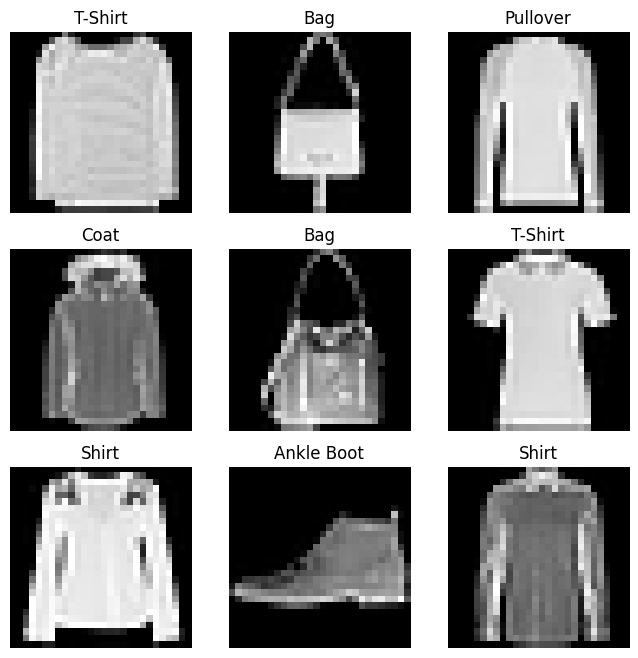

In [34]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

### Creating a Custom Dataset for your files

A custom Dataset class must implement three functions: ___ init ___, __ len __, and __ getitem __.

In [ ]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

- The __ init __ function is run once when instantiating the Dataset object.
- The __ len __ function returns the number of samples in our dataset.
- The __ getitem __ function loads and returns a sample from the dataset at the given index idx. 

### Preparing Dataset for training with Data Loaders

The Dataset retrieves our dataset’s features and labels one sample at a time. While training a model, we typically want to pass samples in “minibatches”, reshuffle the data at every epoch to reduce model overfitting, and use Python’s multiprocessing to speed up data retrieval.

`DataLoader` is an iterable that abstracts this complexity for us in an easy API.

In [35]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

### Iterate through the DataLoader

We have loaded that dataset into the DataLoader and can iterate through the dataset as needed. Each iteration below returns a batch of train_features and train_labels (containing batch_size=64 features and labels respectively). Because we specified shuffle=True, after we iterate over all batches the data is shuffled (for finer-grained control over the data loading order, take a look at [Samplers](https://pytorch.org/docs/stable/data.html#data-loading-order-and-sampler)).

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


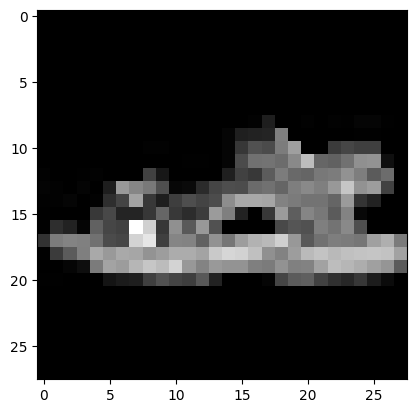

Label: 5


In [45]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

## Transforms

Data does not always come in its final processed form that is required for training machine learning algorithms. We use transforms to perform some manipulation of the data and make it suitable for training.

All TorchVision datasets have two parameters - `transform` to modify the features and `target_transform` to modify the labels - that accept callables containing the transformation logic. 

The torchvision.transforms module offers several commonly-used transforms out of the box.

In [46]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

## Building Neural Networks with Pytorch

Neural networks comprise of layers/modules that perform operations on data. The torch.nn namespace provides all the building blocks you need to build your own neural network. Every module in PyTorch subclasses the nn.Module. A neural network is a module itself that consists of other modules (layers). This nested structure allows for building and managing complex architectures easily.

We define our neural network by subclassing nn.Module, and initialize the neural network layers in __ init __. Every nn.Module subclass implements the operations on input data in the forward method.

## Autodiff Pytorch

When training neural networks, the most frequently used algorithm is back propagation. In this algorithm, parameters (model weights) are adjusted according to the gradient of the loss function with respect to the given parameter.

To compute those gradients, PyTorch has a built-in differentiation engine called torch.autograd. It supports automatic computation of gradient for any computational graph.

Consider the simplest one-layer neural network, with input x, parameters w and b, and some loss function. It can be defined in PyTorch in the following manner

In [53]:
import torch

x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

In [54]:
print(w.shape,b.shape)
print(w.type(),b.type())

torch.Size([5, 3]) torch.Size([3])
torch.FloatTensor torch.FloatTensor


A function that we apply to tensors to construct computational graph is in fact an object of class Function. This object knows how to compute the function in the forward direction, and also how to compute its derivative during the backward propagation step. A reference to the backward propagation function is stored in grad_fn property of a tensor.

In [55]:
print(f"Gradient function for z = {z.grad_fn}")
print(f"Gradient function for loss = {loss.grad_fn}")

Gradient function for z = <AddBackward0 object at 0x165acfa30>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x165aceaa0>


In [56]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.3029, 0.3169, 0.0125],
        [0.3029, 0.3169, 0.0125],
        [0.3029, 0.3169, 0.0125],
        [0.3029, 0.3169, 0.0125],
        [0.3029, 0.3169, 0.0125]])
tensor([0.3029, 0.3169, 0.0125])


### Disabling Gradient Tracking

In [57]:
z = torch.matmul(x, w)+b
print(z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x, w)+b
print(z.requires_grad)

True
False


In [58]:
z = torch.matmul(x, w)+b
z_det = z.detach()
print(z_det.requires_grad)

False


There are reasons you might want to disable gradient tracking:

- To mark some parameters in your neural network as frozen parameters.

- To speed up computations when you are only doing forward pass, because computations on tensors that do not track gradients would be more efficient.

### Computational Graphs

Conceptually, autograd keeps a record of data (tensors) and all executed operations (along with the resulting new tensors) in a directed acyclic graph (DAG) consisting of Function objects. In this DAG, leaves are the input tensors, roots are the output tensors. By tracing this graph from roots to leaves, you can automatically compute the gradients using the chain rule.

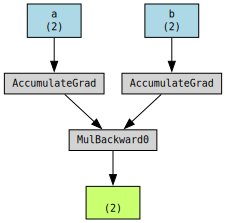

In [59]:
from torchviz import make_dot
import torch

# Example tensor with requires_grad=True
a = torch.tensor([2.0, 3.0], requires_grad=True)
b = torch.tensor([6.0, 4.0], requires_grad=True)
Q = a * b

# Visualize the graph
make_dot(Q, params={'a': a, 'b': b})


In a forward pass, autograd does two things simultaneously:

run the requested operation to compute a resulting tensor
maintain the operation’s gradient function in the DAG.
The backward pass kicks off when .backward() is called on the DAG root. autograd then:

computes the gradients from each .grad_fn,
accumulates them in the respective tensor’s .grad attribute
using the chain rule, propagates all the way to the leaf tensors.

### Gradients and Jacobin Products

https://pytorch.org/tutorials/beginner/basics/autogradqs_tutorial.html#optional-reading-tensor-gradients-and-jacobian-products

In many cases, we have a scalar loss function, and we need to compute the gradient with respect to some parameters. However, there are cases when the output function is an arbitrary tensor. In this case, PyTorch allows you to compute so-called Jacobian product, and not the actual gradient.

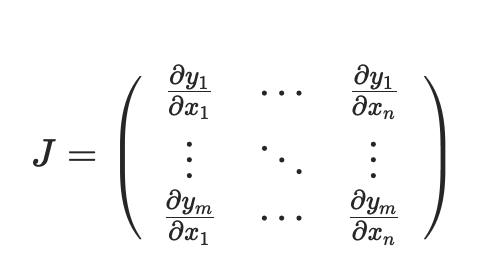

In [60]:
inp = torch.eye(4, 5, requires_grad=True)
out = (inp+1).pow(2).t()
out.backward(torch.ones_like(out), retain_graph=True)
print(f"First call\n{inp.grad}")
out.backward(torch.ones_like(out), retain_graph=True)
print(f"\nSecond call\n{inp.grad}")
inp.grad.zero_()
out.backward(torch.ones_like(out), retain_graph=True)
print(f"\nCall after zeroing gradients\n{inp.grad}")

First call
tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.]])

Second call
tensor([[8., 4., 4., 4., 4.],
        [4., 8., 4., 4., 4.],
        [4., 4., 8., 4., 4.],
        [4., 4., 4., 8., 4.]])

Call after zeroing gradients
tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.]])


> References:  https://pytorch.org/docs/stable/notes/autograd.html

## Optimizing Model Parameters

## Saving and Loading Models

## Custom Operators